In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Dataset : mall.csv
#To laod Dataset 
df=pd.read_csv("mall.csv")

In [3]:
#To show first 5 records
df.head()

,INCOME,SPEND
0,233,150
1,250,187
2,204,172
3,236,178
4,354,163


In [4]:
#How many ros and columns 
df.shape

(303, 2)

In [5]:
#To check null values
df.isnull().sum()

INCOME    0
SPEND     0
dtype: int64

In [6]:
#Check datatypes of each column
df.dtypes

INCOME    int64
SPEND     int64
dtype: object

In [7]:
#To check duplicates records
df.duplicated().sum()

7

In [8]:
#To show duplicates rows 
df[df.duplicated()]

,INCOME,SPEND
118,204,172
164,175,173
228,288,159
230,243,152
261,230,160
265,212,132
270,249,144


In [9]:
#To remove duplicates records permanently 
df.drop_duplicates(inplace=True)

In [10]:
df.duplicated().sum()

0

In [11]:
#select input  , copy all records with columns from df to X
X=df.copy()

In [12]:
X

,INCOME,SPEND
0,233,150
1,250,187
2,204,172
3,236,178
4,354,163
...,...,...
298,241,123
299,264,132
300,193,141
301,131,115


In [13]:
#Apply StandardScaler on input X
from sklearn.preprocessing import StandardScaler 
#create object of StandardScaler class
ss=StandardScaler()
X=ss.fit_transform(X) #change numpy 2D array
X

array([[-0.26035663,  0.02186759],
       [ 0.08910044,  1.62920884],
       [-0.8564893 ,  0.97758401],
       [-0.19868774,  1.23823394],
       [ 2.22695551,  0.58660911],
       [-1.10316488, -0.06501572],
       [ 0.99357759,  0.15219256],
       [ 0.35633233,  1.02102567],
       [-0.95927079,  0.54316746],
       [-1.59651605,  1.06446732],
       [-0.13701884,  0.45628415],
       [ 0.60300791, -0.45599062],
       [ 0.41800122,  0.93414236],
       [-0.71259521, -0.23878234],
       [ 0.7674583 ,  0.54316746],
       [-0.54814482,  0.36940083],
       [ 1.93916733,  0.97758401],
       [-0.40425073, -1.54203201],
       [ 0.02743155,  0.93414236],
       [-0.13701884,  0.06530925],
       [-0.23980034,  0.4997258 ],
       [-0.26035663,  1.2816756 ],
       [-0.40425073,  1.23823394],
       [-0.05479365, -0.54287393],
       [-0.95927079,  1.23823394],
       [ 1.15802798,  0.54316746],
       [-0.69203891,  0.32595918],
       [-1.45262196, -1.15105711],
       [ 3.52200233,

In [14]:
from sklearn.cluster import KMeans
#use ELBOW Method Why ?
#To find the no. of clusters K in given dataset 
#Visualise betweek value of K and SSE (sum of squared error )
K=[] #declare empty list which hold different value of K
SSE=[] #declare empty list which hold value of SSE 
for i in range(1,21): #Start no. of cluster i=1 stop <21 step=i=i+1
    #Create object of KMeans class and passing the parameters 
    km=KMeans(n_clusters=i,random_state=1) #i=1 then i=2 ,...i=20
    #use inbuilt method of KMeans class : fit() : it is used to 
    #find the sum of squared error and hold these error on object of KMeans
    #class
    km.fit(X)
    #To hold the value of K in list K
    K.append(i)
    #To hold the value of SSE in list SSE
    SSE.append(km.inertia_)#inertia_ inbuilt attributes of KMeans class    

In [15]:
dict={'K':K,'SSE':SSE}
df1=pd.DataFrame(dict)
df1

,K,SSE
0,1,592.000000
1,2,391.315497
2,3,247.292367
3,4,193.836346
4,5,152.315673
5,6,128.583208
6,7,112.561278
7,8,99.538230
8,9,89.071835
9,10,78.962854


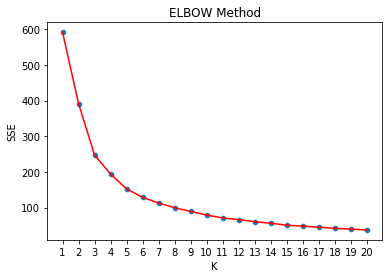

In [16]:
#Visualise  between K and SSE
sns.scatterplot(data=df1,x='K',y='SSE')
sns.lineplot(data=df1,x='K',y='SSE',color='red')
plt.xticks(K)
plt.title("ELBOW Method")
plt.show()

In [17]:
df

,INCOME,SPEND
0,233,150
1,250,187
2,204,172
3,236,178
4,354,163
...,...,...
298,241,123
299,264,132
300,193,141
301,131,115


In [18]:
#clearly understand from above graph, No. of customer K=5 in given dataset
#Create object of KMeans class and passing the parameters 
km=KMeans(n_clusters=5,random_state=1)

In [19]:
#use fit_predict() inbuilt method of KMeans class
Y_pred=km.fit_predict(X)

In [20]:
Y_pred

array([1, 4, 4, 4, 0, 2, 0, 1, 4, 4, 1, 1, 1, 2, 0, 4, 0, 2, 4, 1, 1, 4,
       4, 1, 4, 0, 4, 2, 0, 4, 4, 2, 4, 1, 2, 4, 0, 4, 1, 0, 0, 4, 1, 1,
       0, 0, 4, 1, 2, 1, 1, 0, 1, 4, 4, 4, 4, 4, 4, 0, 3, 0, 4, 2, 4, 4,
       1, 4, 4, 4, 1, 1, 4, 4, 4, 1, 1, 4, 4, 1, 4, 0, 0, 0, 3, 1, 1, 4,
       4, 3, 4, 4, 4, 0, 2, 2, 0, 1, 0, 4, 4, 1, 4, 4, 4, 2, 2, 1, 1, 1,
       0, 4, 0, 4, 1, 4, 4, 4, 1, 3, 4, 1, 1, 4, 4, 2, 1, 4, 3, 4, 1, 0,
       1, 0, 1, 2, 2, 2, 3, 0, 0, 4, 1, 2, 1, 1, 4, 4, 2, 1, 2, 1, 1, 1,
       2, 4, 4, 1, 4, 4, 0, 4, 4, 3, 2, 1, 1, 4, 1, 4, 0, 4, 2, 2, 1, 0,
       2, 3, 0, 2, 0, 4, 3, 0, 1, 3, 4, 4, 0, 2, 2, 1, 4, 0, 1, 1, 3, 1,
       4, 1, 3, 1, 2, 1, 1, 1, 2, 4, 1, 1, 2, 0, 1, 0, 3, 0, 3, 1, 0, 2,
       0, 3, 3, 2, 3, 2, 3, 3, 0, 3, 3, 0, 0, 0, 0, 1, 3, 1, 2, 3, 2, 1,
       0, 3, 4, 1, 3, 1, 3, 3, 3, 0, 3, 2, 1, 4, 4, 3, 1, 2, 3, 2, 3, 3,
       1, 3, 1, 3, 4, 2, 1, 0, 2, 3, 4, 2, 4, 2, 3, 4, 4, 0, 2, 4, 0, 1,
       1, 2, 2, 2, 2, 3, 3, 2, 2, 4])

In [22]:
#Add new column for output in given dataframe df
df['Target']=Y_pred

#to show first 10 records
df.head(10)

,INCOME,SPEND,Target
0,233,150,1
1,250,187,4
2,204,172,4
3,236,178,4
4,354,163,0
5,192,148,2
6,294,153,0
7,263,173,1
8,199,162,4
9,168,174,4


In [24]:
df0=df[df['Target']==0] #create new dataframe df0 which hold those records whose target=0
df1=df[df['Target']==1] #create new dataframe df1 which hold those records whose target=1
df2=df[df['Target']==2] #create new dataframe df2 which hold those records whose target=2
df3=df[df['Target']==3] #create new dataframe df3 which hold those records whose target=3
df4=df[df['Target']==4] #create new dataframe df4 which hold those records whose target=4


In [25]:
df0.shape,df1.shape, df2.shape, df3.shape, df4.shape

((49, 3), (75, 3), (49, 3), (39, 3), (84, 3))

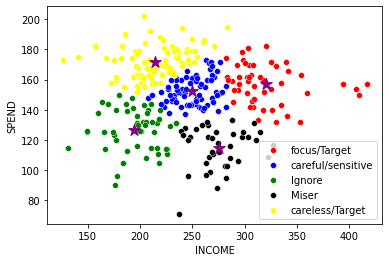

In [38]:
#visualise scatterplot
sns.scatterplot(data=df0, x='INCOME', y='SPEND', color='red',label='focus/Target')
sns.scatterplot(data=df1, x='INCOME', y='SPEND', color='blue', label='careful/sensitive')
sns.scatterplot(data=df2, x='INCOME', y='SPEND', color='green',label='Ignore')
sns.scatterplot(data=df3, x='INCOME', y='SPEND', color='black',label='Miser')
sns.scatterplot(data=df4, x='INCOME', y='SPEND', color='yellow',label='careless/Target')
plt.scatter(ss.inverse_transform(km.cluster_centers_)[:,0],
            ss.inverse_transform(km.cluster_centers_)[:,1],color='purple',marker='*',s=150)
plt.show()

In [34]:
#To show centroid of each cluster
#use inbuilt attributes cluster_centers_ of KMeans class

km.cluster_centers_

array([[ 1.53097797,  0.33482482],
       [ 0.08032976,  0.12554834],
       [-1.04611067, -0.99324865],
       [ 0.6135496 , -1.50081813],
       [-0.63942457,  0.96879225]])

In [36]:
#To remove StanddardScaler on centroid, use inbuilt method of StandardScaler : inverse_transform()
ss.inverse_transform(km.cluster_centers_).round(2)3

array([[320.14, 157.2 ],
       [249.57, 152.39],
       [194.78, 126.63],
       [275.51, 114.95],
       [214.56, 171.8 ]])